<a href="https://colab.research.google.com/github/ArturAllen/Processamento-Digital-de-Imagens/blob/main/Atividade3_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

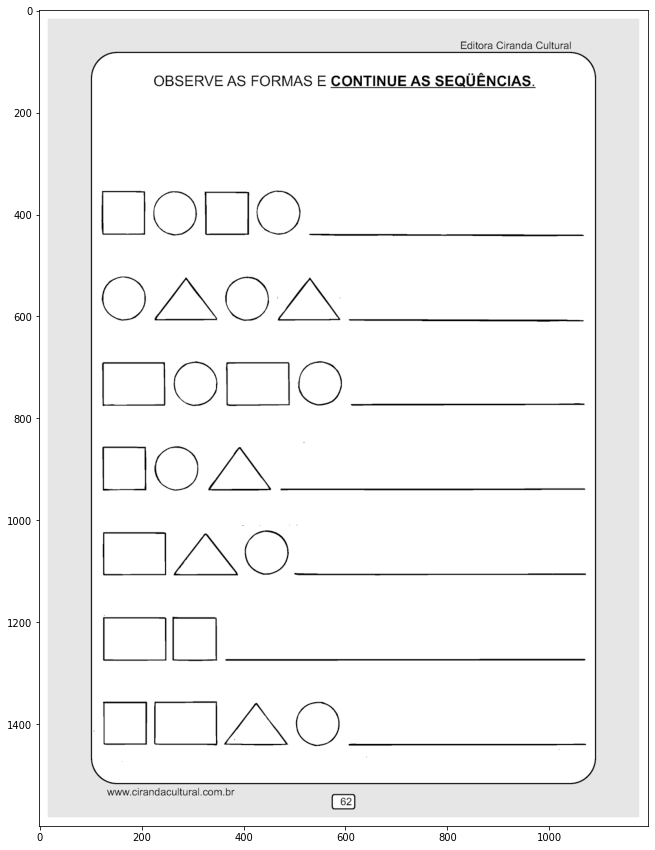

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
image = io.imread("https://www.dropbox.com/s/j7ssyxq81x833iq/04.png?dl=1")
plt.figure(figsize=(15,15))
plt.imshow(image)

# Codigos baseados nos seguintes links:
# https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
# https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
# https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html
# https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576

# Link do video de explicacao: https://youtu.be/WAZiyNqhMHQ


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


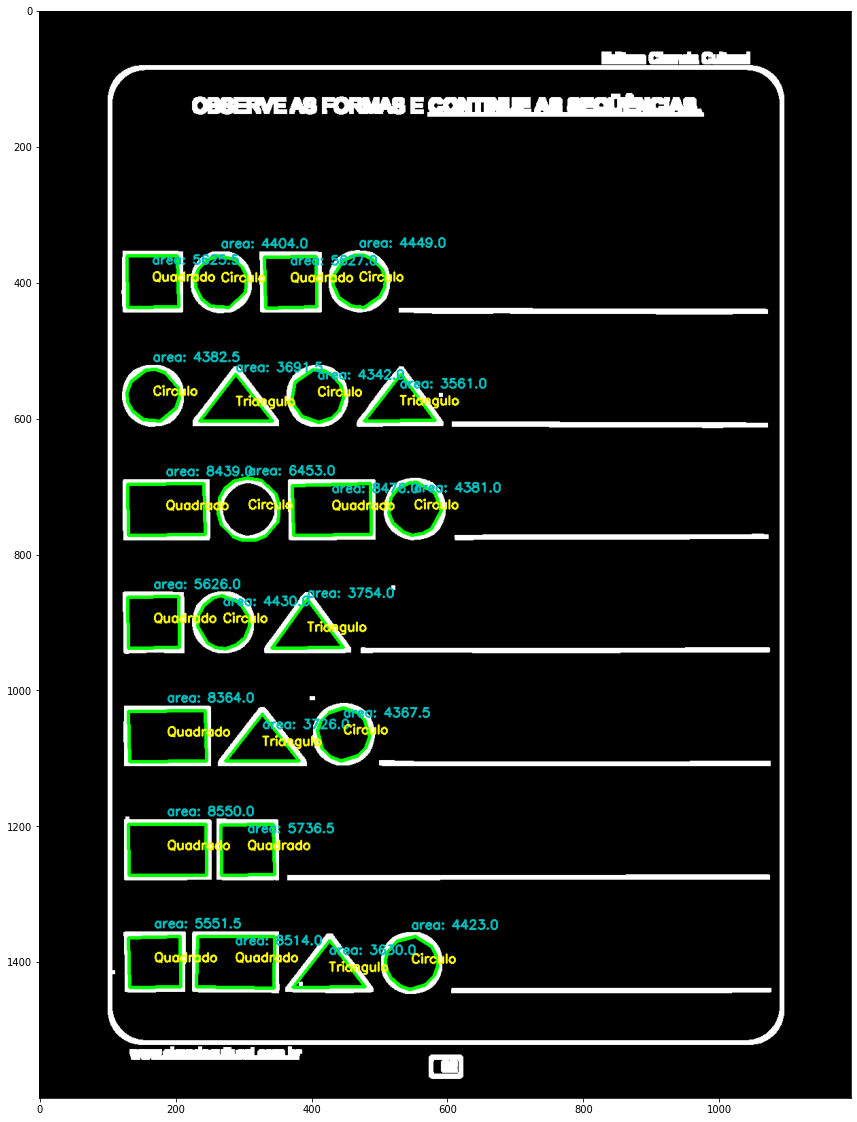

In [ ]:
ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV) # Converte a imagem para o formato binario invertido


kernel = np.ones((6,6))

dilated = cv2.dilate(thresh, kernel)
opening = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)

imgray = cv2.cvtColor(opening, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(imgray, 127, 255, 0)

contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


shapes_temp = []
for i in range (0, np.size(contours)): # Filtra os contornos por area e numero de lados
  epsilon = 0.01*cv2.arcLength(contours[i],True)
  approx = cv2.approxPolyDP(contours[i],epsilon,True)
  dims = np.shape(approx)
  area = cv2.contourArea(approx)
  if dims[0] <= 14 and area > 2000 and area < 10000:
      shapes_temp.append(approx)

shapes = []
for i in range (0, np.size(shapes_temp)): # Filtra os objetos por distancia. Necessario pois as vezes um objeto pode ter dois contornos associados
  inserir = True
  for k in range (i+1, np.size(shapes_temp)):
    M_i = cv2.moments(shapes_temp[i])
    M_k = cv2.moments(shapes_temp[k])

    dx = float(M_i['m10']/M_i['m00']) - float(M_k['m10']/M_k['m00'])
    dy = float(M_i['m01']/M_i['m00']) - float(M_k['m01']/M_k['m00'])

    dist = abs(dx) + abs(dy)
    if dist < 10:
      inserir = False
      break
  if inserir:
    shapes.append(shapes_temp[i])

cv2.drawContours(opening, shapes, -1, (0,255,0), 3)

for i in range (0, np.size(shapes)): # Insere informacoes dos objetos (nome e area)
  dims = np.shape(shapes[i])
  if dims[0] == 4:
    nome = 'Quadrado'
  elif dims[0] == 3:
    nome = 'Triangulo'
  else:
    nome = 'Circulo'

  M = cv2.moments(shapes[i])
  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])
  if i % 2 == 0:
    altura = 25
  else:
    altura = 50

  cv2.putText(opening, nome, (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 0.625, (255,255,0), 2, cv2.FILLED)

  area = cv2.contourArea(shapes[i])
  cv2.putText(opening, 'area: '+ str(area), (cx,cy-altura), cv2.FONT_HERSHEY_SIMPLEX, 0.625, (0,192,192), 2, cv2.FILLED)

plt.figure(figsize=(20,20))
plt.imshow(opening)